### Monterey Wharf 2 - Seasonal cycle

Start by importing libraries and reading data into a Pandas data frame.

In [25]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data_files/Monterey_Wharf2_shorestation_hourly.csv'
df = pd.read_csv(filename,parse_dates=[0])


The `unix_time` variable is the number of seconds since Jan-1-1970. The `Date_Time` variable contains the same times in in the DateTime64 format used by Numpy and Pandas. This is useful for plotting.

In [26]:
unix_time = np.array(df['unix_time'])


Date_Time = np.array(df['Date_Time'])
Temp = np.array(df['Temp']) # Temperature
ii, = np.isfinite([Temp])   #found the values there were numbers for temp and indexed it for both temp and unix time
Temp_fin=Temp[ii]


unix_time_fin=unix_time[ii]

Make a preliminary plot of the time series.

<IPython.core.display.Javascript object>


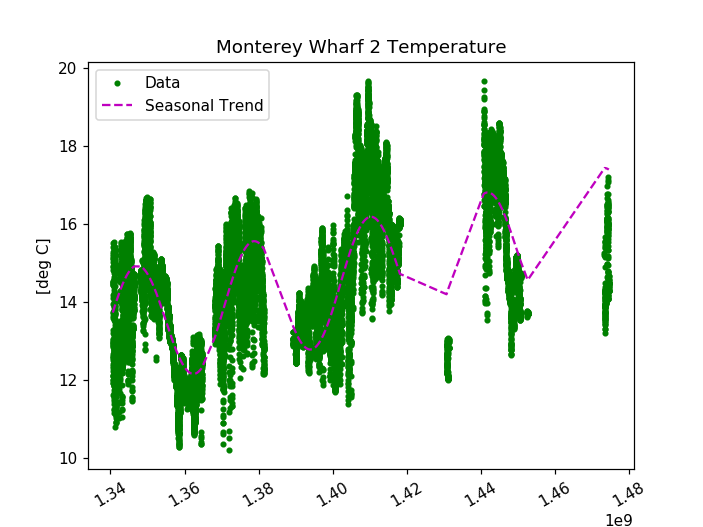

In [27]:
plt.figure()
plt.plot(unix_time_fin,Temp_fin, 'g.', label='Data')  #plotting the unix time by the data
plt.ylabel('[deg C]')
plt.title('Monterey Wharf 2 Temperature')
plt.xticks(rotation=30);

In [28]:
from mytools import harmonic   #importing my function from my tools
coefficient = harmonic.seasonal_fit(unix_time_fin,Temp_fin,31536000)  #tannual in seconds per year 315360000
print(coefficient)

[ -1.33107719e+01   1.98224218e-08  -1.49962670e+00  -3.63135565e-01]


In [29]:
y_fit = (coefficient[0] + coefficient[1]*unix_time_fin + coefficient[2]*np.sin(2*np.pi*unix_time_fin/31536000) + 
         coefficient[3]*np.cos(2*np.pi*unix_time_fin/31536000))
 #equation that the coefficients are plugged into to create a line to graph
print(y_fit)


[ 13.72912728  13.73025367  13.73137982 ...,  17.39637277  17.39612431
  17.39587509]


In [30]:
#plt.figure()
#plt.plot(Date_Time,Temp)
plt.ylabel('[deg C]')
plt.title('Monterey Wharf 2 Temperature')
plt.xticks(rotation=30);
plt.plot(unix_time_fin,y_fit, 'm--', label='Seasonal Trend')   #plotting the seasonal trend over the data

plt.legend()


In [31]:
y_fit

array([ 13.72912728,  13.73025367,  13.73137982, ...,  17.39637277,
        17.39612431,  17.39587509])

[-0.73087272 -0.69974633 -0.74362018 ...,  2.94137277  2.99112431
  3.01587509]


<IPython.core.display.Javascript object>


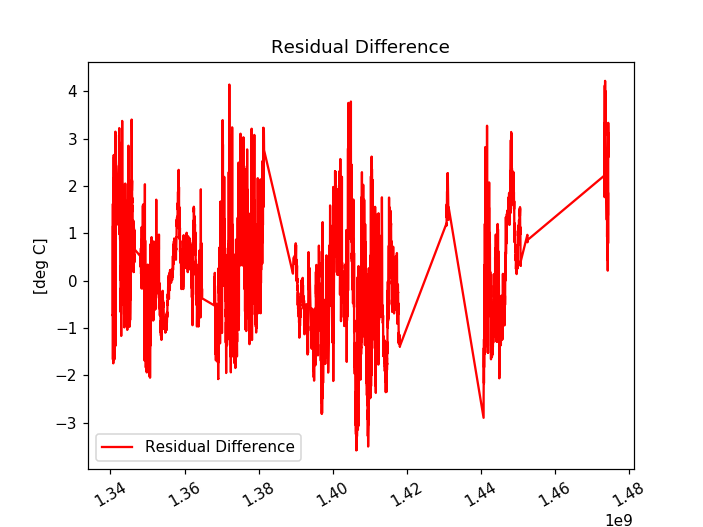

In [32]:
#residual difference  is teh difference between the data and the model

residual_diff=y_fit-Temp_fin
print(residual_diff) 

plt.figure()
plt.ylabel('[deg C]')
plt.title('Residual Difference')
plt.xticks(rotation=30);
plt.plot(unix_time_fin,residual_diff, 'r-', label='Residual Difference')   #plotting the residual difference to compare the model to the data
plt.legend()


In [ ]:
#model matches the data well and follows the trend. This could be made better by having more data. 
#The gaps where there is no finite data, makes the model not match as well in those areas. If there
# were less gaps, the model would match better. The residual difference also matches the trend with a maximum difference
# between the model and data being aroun 4 degrees C. This shows that the model matches the data pretty well. 